# Linear regression with `python` and `numpy`
Author: **[Carl McBride Ellis](https://u-tad.com/claustro/carl-mcbride-ellis/)**

Load in the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## Read in the dataset \#1 by Anscombe

In [2]:
url = 'https://raw.githubusercontent.com/Carl-McBride-Ellis/datasets_public/refs/heads/main/Anscombe_quintet_data.csv'
df = pd.read_csv(url).sort_values(by='x1235', ascending=True)
# take a look
df

,x1235,y1,y2,y3,y5,x4,y4
7,4.0,4.26,3.10,5.39,6.03,19.0,12.50
10,5.0,5.68,4.74,5.73,5.92,8.0,6.89
6,6.0,7.24,6.13,6.08,5.80,8.0,5.25
9,7.0,4.82,7.26,6.42,5.68,8.0,7.91
1,8.0,6.95,8.14,6.77,5.56,8.0,5.76
3,9.0,8.81,8.77,7.11,5.45,8.0,8.84
0,10.0,8.04,9.14,7.46,9.82,8.0,6.58
4,11.0,8.33,9.26,7.81,9.72,8.0,8.47
8,12.0,10.84,9.13,8.15,9.61,8.0,5.56
2,13.0,7.58,8.74,12.74,9.51,8.0,7.71


In [3]:
# select dataset y1
df["x"] = df["x1235"]
df["y"] = df["y1"]

## Take a look at the data

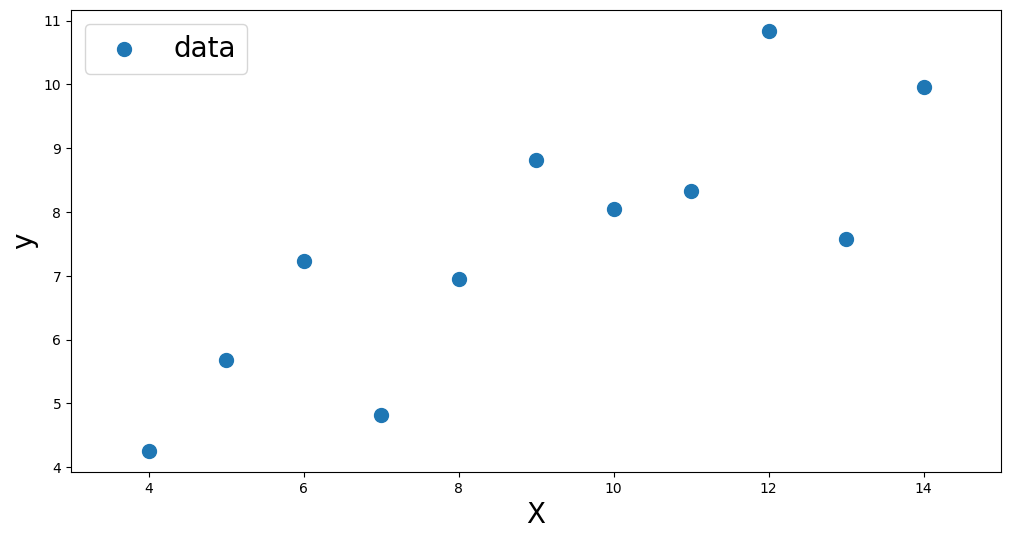

In [4]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(df["x"], df["y"], s=100, label='data')
plt.legend(loc='upper left', fontsize=20)
plt.xlim(3,15)
plt.xlabel('X', fontsize=20)
plt.ylabel('y', fontsize=20);

## [Ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) (OLS)

Equation of a straight line:

$$\large y = \beta_1 x + \beta_0 $$

The OLS equation for $\beta_1$

$$\large \beta_1 = \frac{ \sum \left( (x_i - \overline{x}) (y_i - \overline{y}) \right) } {\sum  ((x_i - \overline{x})^2)}$$


and the equation for $\beta_0$

$$\large \beta_0 = \overline{y} - \beta_1 \overline{x} $$

Functions to help you:

* [`len(x)`](https://docs.python.org/3/library/functions.html#len) - find the lenth of an object, here `x`.
* $x_i$ is the series `x`
* $\overline{x}$ is [`np.mean(x)`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)
* $x^2$ in code is written as `x**2`
* $\sum x_i$ is [`np.sum(x)`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) where the symbol $\sum$ represents a [summation](https://en.wikipedia.org/wiki/Summation)

In [5]:
%%time

X = df["x"]
y = df["y"]

# tmp "place-holder" data
b1 = -0.6
b0 = 8

# insert your code here to calculate b1 and b0

print(b1, b0)

-0.6 8
CPU times: user 276 µs, sys: 0 ns, total: 276 µs
Wall time: 285 µs


## Plot our fit

Use your values for  $\beta_1$ and $\beta_0$

In [6]:
df["y_pred"] =  b1*df["x"] + b0

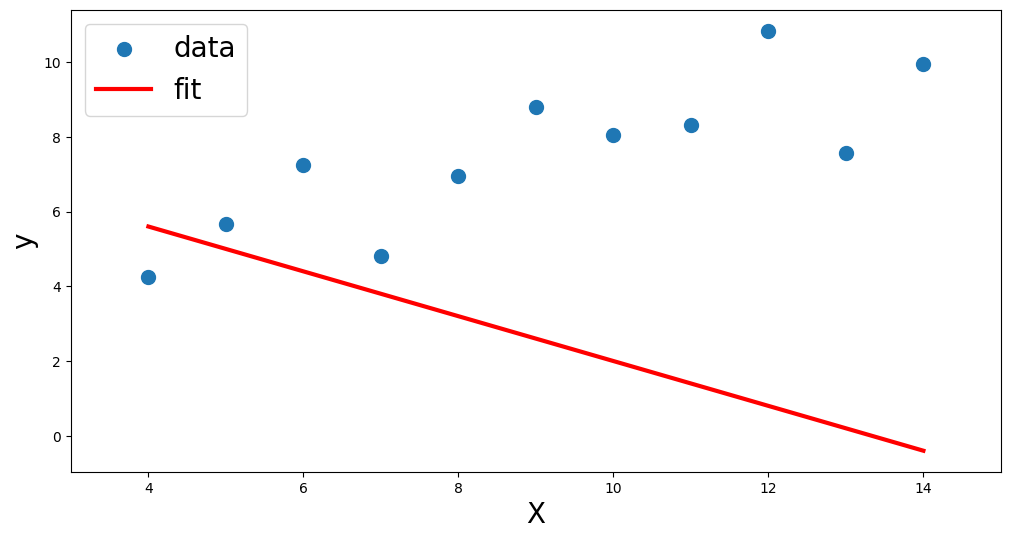

In [7]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(df["x"], df["y"], s=100, label='data')
plt.plot(df["x"], df["y_pred"], color="red", lw=3, label='fit')
plt.legend(loc='upper left', fontsize=20)
plt.xlim(3,15)
plt.xlabel('X', fontsize=20)
plt.ylabel('y', fontsize=20);

## Using linear algebra and the [Normal equation](http://mlwiki.org/index.php/Normal_Equation)

Treat the problem as a [aystem of linear equations](https://en.wikipedia.org/wiki/System_of_linear_equations)

$$\large \mathbf{\beta} \mathbf{X} = \mathbf{y} $$

where $ \mathbf{\beta}$ is a matrix of coefficients. For example

$$\large   \beta_1 (x_1)^1 + \beta_0 (x_1)^0= y_1 $$.

which can be written as

$$ \mathbf{\beta} \mathbf{X}^T \mathbf{X}  = \mathbf{X}^T \mathbf{y} $$


$$  \mathbf{\beta} = (\mathbf{X}^T\mathbf{X})^{-1} \mathbf{X}^T y $$

where $\mathbf{X}^T$ is the [transpose of a matrix](https://en.wikipedia.org/wiki/Transpose) (in python use the `.T` method)

We shall use [`numpy.linalg.inv`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) function to calculate the inverse matrix

In [8]:
%%time

# Create a matrix of x, with an x^0 term (i.e. a column of 1's)
X1 = np.column_stack(( X, np.ones(len(X)) ))

# Use the "Normal equation"
betas = np.linalg.inv(X1.T @ X1) @ X1.T @ y

print(betas)

[0.50009091 3.00009091]
CPU times: user 872 µs, sys: 1.11 ms, total: 1.98 ms
Wall time: 12.2 ms


## Polynomial regression
Let us now look at dataset \#2 by Anscombe

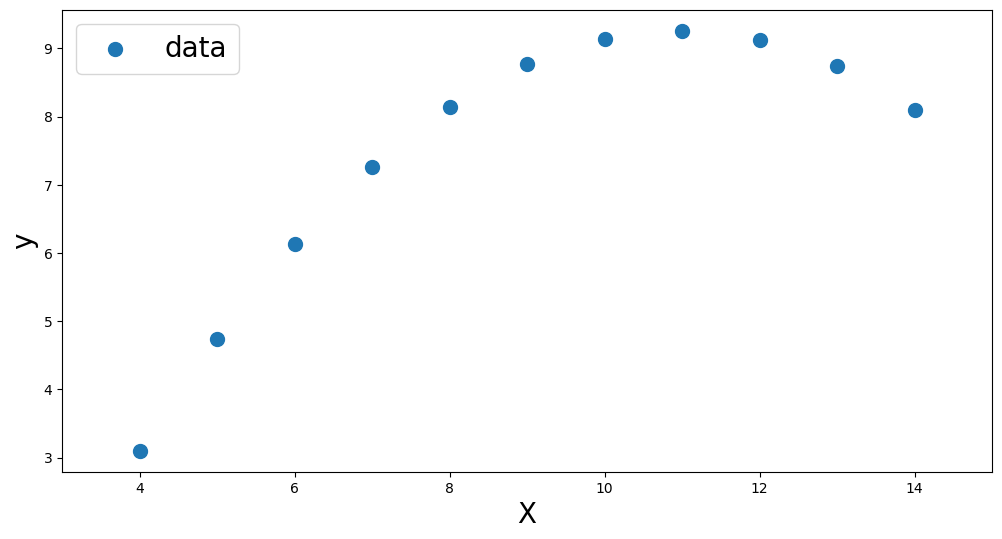

In [9]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(df["x1235"], df["y2"], s=100, label='data')
plt.legend(loc='upper left', fontsize=20)
plt.xlim(3,15)
plt.xlabel('X', fontsize=20)
plt.ylabel('y', fontsize=20);

In [10]:
# create a new feature

df["x_squared"] = df["x"]**2

# take a look
df

,x1235,y1,y2,y3,y5,x4,y4,x,y,y_pred,x_squared
7,4.0,4.26,3.10,5.39,6.03,19.0,12.50,4.0,4.26,5.6,16.0
10,5.0,5.68,4.74,5.73,5.92,8.0,6.89,5.0,5.68,5.0,25.0
6,6.0,7.24,6.13,6.08,5.80,8.0,5.25,6.0,7.24,4.4,36.0
9,7.0,4.82,7.26,6.42,5.68,8.0,7.91,7.0,4.82,3.8,49.0
1,8.0,6.95,8.14,6.77,5.56,8.0,5.76,8.0,6.95,3.2,64.0
3,9.0,8.81,8.77,7.11,5.45,8.0,8.84,9.0,8.81,2.6,81.0
0,10.0,8.04,9.14,7.46,9.82,8.0,6.58,10.0,8.04,2.0,100.0
4,11.0,8.33,9.26,7.81,9.72,8.0,8.47,11.0,8.33,1.4,121.0
8,12.0,10.84,9.13,8.15,9.61,8.0,5.56,12.0,10.84,0.8,144.0
2,13.0,7.58,8.74,12.74,9.51,8.0,7.71,13.0,7.58,0.2,169.0


In [11]:
X = df[["x_squared", "x"]]
y = df["y2"]

X1 = np.column_stack(( X, np.ones(len(X)) ))

# Use the "Normal equation"
betas = np.linalg.inv(X1.T @ X1) @ X1.T @ y

print(betas)

[-0.12671329  2.78083916 -5.99573427]


In [12]:
df["y_pred"] =  betas[0]*df["x_squared"] + betas[1]*df["x"] + betas[2]

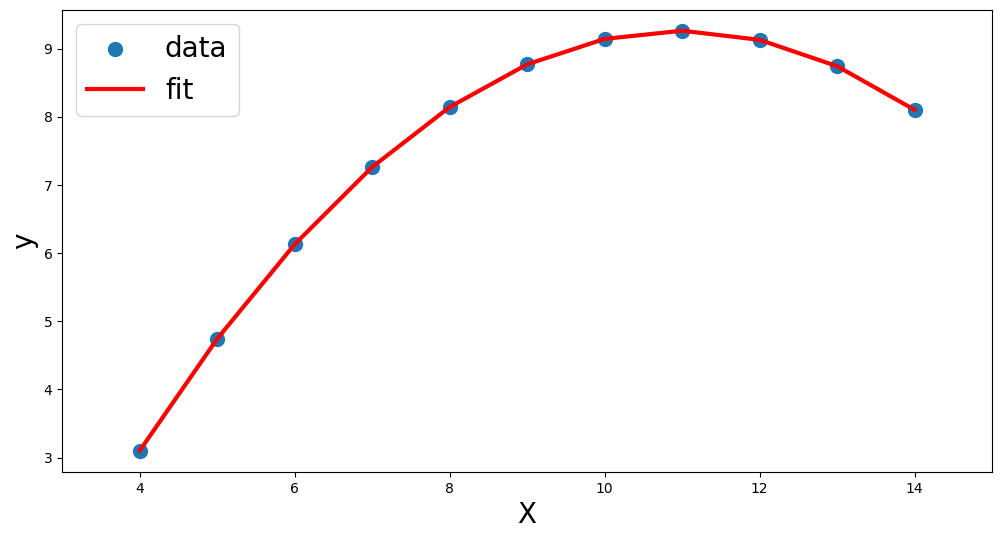

In [13]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(df["x1235"], df["y2"], s=100, label='data')
plt.plot(df["x"], df["y_pred"], color="red", lw=3, label='fit')
plt.legend(loc='upper left', fontsize=20)
plt.xlim(3,15)
plt.xlabel('X', fontsize=20)
plt.ylabel('y', fontsize=20);

# Using OLS from the  [statsmodels](https://www.statsmodels.org/stable/index.html) library
(Note: You may need to first install `statsmodels` using `!pip install -q statsmodels`)

In [14]:
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.378e+06
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           8.64e-26
Time:                        12:15:37   Log-Likelihood:                 56.471
No. Observations:                  11   AIC:                            -106.9
Df Residuals:                       8   BIC:                            -105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9957      0.004  -1384.713      0.0

and to calculate the (95%) confidence intervals of the $\beta$ parameters

In [15]:
results.conf_int(alpha=0.05, cols=None)

,0,1
const,-6.005719,-5.985749
x_squared,-0.126845,-0.126582
x,2.778441,2.783238


# and with the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from [scikit-learn](https://scikit-learn.org/stable/index.html)

In [16]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept=True)
regressor.fit(X, y)

LinearRegression()

Now let us look at the values of the $\beta$ parameters. <br>
(Note: You may need to first install `eli5` using `!pip install -q eli5`)

In [18]:
!pip install -q eli5
import eli5

feature_names = X.columns.tolist()
eli5.show_weights(regressor, top=None, feature_names = feature_names )

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 4.8 MB/s eta 0:00:00


Weight?,Feature
+2.781,x
-0.127,x_squared
-5.996,<BIAS>
